In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### PLANTEAMIENTO DE HIPOTESIS

1. "El Athletic Club tiende a ser más efectivo en la segunda mitad de los partidos, especialmente en casa."

2. "El Athletic Club tiene un desempeño significativamente mejor en partidos en casa en comparación con partidos fuera."

3. "El Athletic Club tiende a remontar partidos cuando está perdiendo al descanso y juega de local"

## 1. Cargar Dataset


In [3]:
data = pd.read_csv("LaLiga_Matches.csv")
data

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10878,2023-24,01-10-2023,Almeria,Granada,3,3,D,3.0,0.0,H
10879,2023-24,01-10-2023,Alaves,Osasuna,0,2,A,0.0,1.0,A
10880,2023-24,01-10-2023,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A
10881,2023-24,01-10-2023,Betis,Valencia,3,0,H,1.0,0.0,H


**1.1 Verificar NaNs y corregir datos**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10881 non-null  float64
 8   HTAG      10881 non-null  float64
 9   HTR       10881 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


In [5]:
filas_con_missing = data[data.isnull().any(axis=1)]

print(filas_con_missing)

       Season        Date    HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
136   1995-96  19-11-1995  Ath Bilbao  La Coruna     1     0   H   NaN   NaN   
1472  1998-99  10-01-1999  Valladolid      Betis     0     3   A   NaN   NaN   

      HTR  
136   NaN  
1472  NaN  


**1.2 Procedo a checkear los resultados en internet**

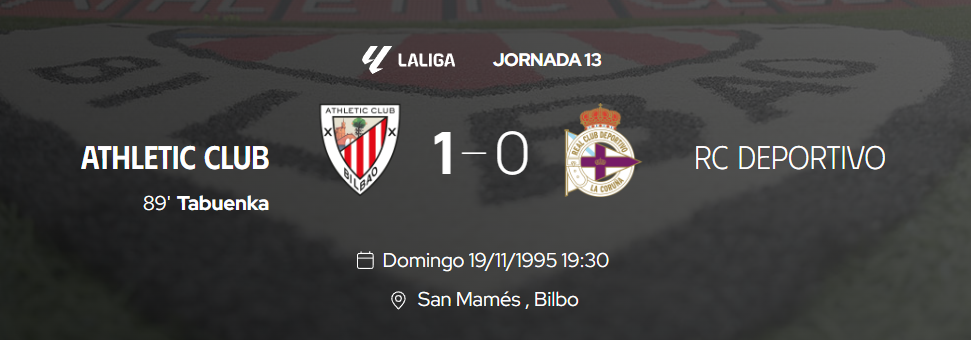

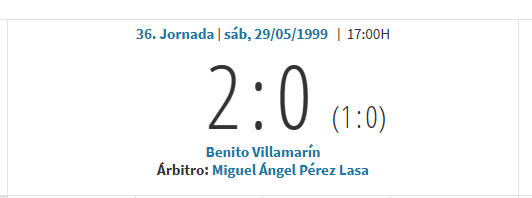

**1.3 Hago los cambios**

In [6]:
data.loc[136, 'HTHG'] = 0
data.loc[136, 'HTAG'] = 0
data.loc[136, 'HTR'] = "D"


data.loc[1472, 'HTHG'] = 1
data.loc[1472, 'HTAG'] = 0
data.loc[1472, 'HTR'] = "H"

filas_corregidas = data.loc[[136,1472]]
filas_corregidas

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
136,1995-96,19-11-1995,Ath Bilbao,La Coruna,1,0,H,0.0,0.0,D
1472,1998-99,10-01-1999,Valladolid,Betis,0,3,A,1.0,0.0,H


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10883 non-null  float64
 8   HTAG      10883 non-null  float64
 9   HTR       10883 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


### RESUMEN DE LAS SIGLAS

1. **FTHG** - Number of goals scored by Home Team.
2. **FTAG** - Number of goals scored by Away Team.
3. **FTR** - Full time result.
4. **HTHG** - Number of goals scored by Home Team at Half time.
5. **HTAG** - Number of goals scored by Away Team at Half time.
6. **HTR** - Half time result.
7. **H** - Home Team.
8. **A** - Away Team.
9. **D** - Draw.

## 2. Eliminar las filas de la temporada 23-24
      Está incompleta y la rellenaremos mas adelante con el dataframe completo de esa temporada

In [8]:
to_drop = data[data['Season'].isin(['2023-24'])].index
data.drop(index=to_drop,inplace=True)
data

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10799,2022-23,04-06-2023,Betis,Valencia,1,1,D,1.0,0.0,H
10800,2022-23,04-06-2023,Celta,Barcelona,2,1,H,1.0,0.0,H
10801,2022-23,04-06-2023,Elche,Cadiz,1,1,D,0.0,1.0,A
10802,2022-23,04-06-2023,Espanol,Almeria,3,3,D,1.0,1.0,D


**2.1. Checkear si no están esas filas con tail() y unique**

In [9]:
print(data["Season"].tail())
print()
print(data["Season"].unique())

10799    2022-23
10800    2022-23
10801    2022-23
10802    2022-23
10803    2022-23
Name: Season, dtype: object

['1995-96' '1996-97' '1997-98' '1998-99' '1999-2000' '2000-01' '2001-02'
 '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23']


### VICTORIAS EN CASA

In [10]:
# ath_home = data[data["HomeTeam"] == "Ath Bilbao"]

# # Estadísticas para los partidos en casa
# home_stats = ath_home.groupby("Season").agg(
#     victorias=("FTR", "count"),  # Número total de partidos en casa ganados
#     goals_favor=("FTHG", "sum"),   # Goles anotados como local
#     goals_contra=("FTAG", "sum")  # Goles encajados como local
# ).reset_index()

# home_stats

### VICTORIAS FUERA

In [11]:
# ath_away = data[data["AwayTeam"] == "Ath Bilbao"]

## 3. Cargar Dataset temporada 23-24

In [12]:
liga_23_24 = pd.read_csv("SP1_23_24.csv")
liga_23_24

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,11/08/2023,18:30,Almeria,Vallecano,0,2,A,0,2,...,1.64,0.00,1.85,2.08,1.86,2.07,1.91,2.09,1.86,2.01
1,SP1,11/08/2023,21:00,Sevilla,Valencia,1,2,A,0,0,...,1.61,-0.50,1.94,1.99,1.94,1.98,1.96,2.00,1.93,1.94
2,SP1,12/08/2023,16:00,Sociedad,Girona,1,1,D,1,0,...,1.72,-0.75,2.05,1.75,2.10,1.82,2.14,1.90,2.04,1.82
3,SP1,12/08/2023,18:30,Las Palmas,Mallorca,1,1,D,1,0,...,1.40,-0.25,2.18,1.77,2.20,1.77,2.21,1.79,2.15,1.75
4,SP1,12/08/2023,20:30,Ath Bilbao,Real Madrid,0,2,A,0,2,...,1.89,0.25,1.99,1.94,1.99,1.93,2.10,1.96,1.95,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,25/05/2024,20:00,Real Madrid,Betis,0,0,D,0,0,...,3.43,-2.00,1.85,2.08,1.87,2.04,2.01,2.09,1.94,1.93
376,SP1,26/05/2024,13:00,Getafe,Mallorca,1,2,A,0,0,...,1.58,-0.25,2.04,1.89,2.05,1.88,2.06,1.93,1.97,1.87
377,SP1,26/05/2024,15:15,Celta,Valencia,2,2,D,0,1,...,2.04,-0.50,1.92,2.01,1.92,2.01,1.98,2.01,1.94,1.91
378,SP1,26/05/2024,15:15,Las Palmas,Alaves,1,1,D,0,0,...,1.96,-0.25,2.06,1.87,2.06,1.88,2.06,1.90,2.01,1.84


In [38]:
liga_23_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to Season
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


**3.1 Limpiar las columnas para la temporada 2023-2024**

In [14]:
liga_23_24_filtered = liga_23_24

liga_23_24_filtered["Season"] = "2023-24"

liga_23_24_filtered = liga_23_24[["Season", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR"]]

liga_23_24_filtered

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,2023-24,11/08/2023,Almeria,Vallecano,0,2,A,0,2,A
1,2023-24,11/08/2023,Sevilla,Valencia,1,2,A,0,0,D
2,2023-24,12/08/2023,Sociedad,Girona,1,1,D,1,0,H
3,2023-24,12/08/2023,Las Palmas,Mallorca,1,1,D,1,0,H
4,2023-24,12/08/2023,Ath Bilbao,Real Madrid,0,2,A,0,2,A
...,...,...,...,...,...,...,...,...,...,...
375,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0,0,D
376,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0,0,D
377,2023-24,26/05/2024,Celta,Valencia,2,2,D,0,1,A
378,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0,0,D


## 4. Unir el dataframe de de la temporada 2023-2024 con el main dataframe

In [15]:
data = pd.concat([data, liga_23_24_filtered], ignore_index=True)
data.tail()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D
11183,2023-24,26/05/2024,Sevilla,Barcelona,1,2,A,1.0,1.0,D


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11184 entries, 0 to 11183
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  11184 non-null  object 
 1   Date                    11184 non-null  object 
 2   HomeTeam                11184 non-null  object 
 3   AwayTeam                11184 non-null  object 
 4   GolesLocal              11184 non-null  int64  
 5   GolesVisitante          11184 non-null  int64  
 6   Ganador                 11184 non-null  object 
 7   GolesDescansoLocal      11184 non-null  float64
 8   GolesDescansoVisitante  11184 non-null  float64
 9   ResultadoDescanso       11184 non-null  object 
 10  GolesPartido            11184 non-null  int64  
 11  DifGolesDesc            11184 non-null  float64
 12  DifGolesFinal           11184 non-null  int64  
 13  VictoriaLocal           11184 non-null  bool   
 14  VictoriaVisitante       11184 non-null

**4.1 Cambiar algunas columnas de float a int**

In [16]:
# data[['HTHG',"HTAG"]] = data[['HTHG',"HTAG"]].astype(int)

**4.2 Cambiar el nombre de las columnas**

In [17]:
data = data.rename(columns={"FTHG": "GolesLocal", 
                            "FTAG": "GolesVisitante", 
                            "FTR": "Ganador", 
                            "HTHG": "GolesDescansoLocal",
                            "HTAG": "GolesDescansoVisitante",
                            "HTR": "ResultadoDescanso"       
                            })
data

,Season,Date,HomeTeam,AwayTeam,GolesLocal,GolesVisitante,Ganador,GolesDescansoLocal,GolesDescansoVisitante,ResultadoDescanso
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D


## 5. Crear nuevas columnas con nuevas métricas

In [18]:
data["GolesPartido"] = data["GolesLocal"] + data["GolesVisitante"]
data["DifGolesDesc"] = data["GolesDescansoLocal"] - data["GolesDescansoVisitante"]
data["DifGolesFinal"] = data["GolesLocal"] - data["GolesVisitante"]
data['VictoriaLocal'] = (data['Ganador'] == 'H') 
data['VictoriaVisitante'] = (data['Ganador'] == 'A')

data


,Season,Date,HomeTeam,AwayTeam,GolesLocal,GolesVisitante,Ganador,GolesDescansoLocal,GolesDescansoVisitante,ResultadoDescanso,GolesPartido,DifGolesDesc,DifGolesFinal,VictoriaLocal,VictoriaVisitante
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,3,2.0,3,True,False
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,3,3.0,3,True,False
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,4,2.0,4,True,False
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,5,0.0,3,True,False
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D,1,0.0,-1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,2023-24,25/05/2024,Real Madrid,Betis,0,0,D,0.0,0.0,D,0,0.0,0,False,False
11180,2023-24,26/05/2024,Getafe,Mallorca,1,2,A,0.0,0.0,D,3,0.0,-1,False,True
11181,2023-24,26/05/2024,Celta,Valencia,2,2,D,0.0,1.0,A,4,-1.0,0,False,False
11182,2023-24,26/05/2024,Las Palmas,Alaves,1,1,D,0.0,0.0,D,2,0.0,0,False,False


## 6. Analisis

In [19]:
goals_season = data.groupby("Season")["GolesPartido"].sum()

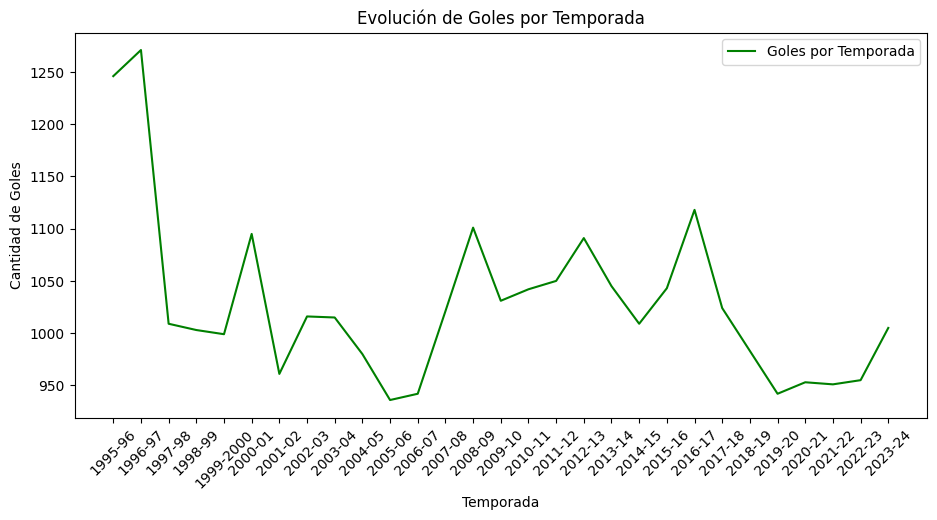

In [33]:
plt.figure(figsize=(11, 5))
plt.plot(goals_season.index, 
         goals_season.values, 
         linestyle='-', 
         color='green', 
         label='Goles por Temporada',
         )

plt.xticks(goals_season.index)
plt.xticks(rotation=45)
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Goles')
plt.title('Evolución de Goles por Temporada')
plt.legend()

plt.show()
